# What is Random Forest?

**Random forest is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler,
which combines the output of multiple decision trees to reach a single result.<br>
Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.**

<br><br>

**Advantages of random forest**

**A random forest produces good predictions that can be understood easily. <br>It can handle large datasets efficiently.<br> The random forest algorithm provides a higher level of accuracy in predicting outcomes over the decision tree algorithm.**

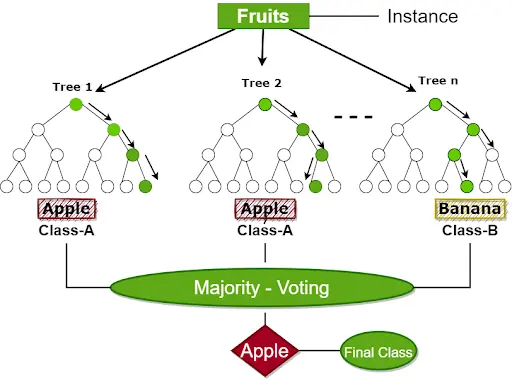


**Fig: Example to understand the working of Random Forest.**

In [1]:
# Pandas is used for data manipulation
import pandas as pd




In [3]:
# Read in data and display first 5 rows
features = pd.read_csv(r"C:\Users\Bindu\Downloads\temps.csv")
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
print('The shape of our features is:', features.shape)

The shape of our features is: (348, 12)


In [5]:
# Descriptive statistics for each column


features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [8]:
# One-hot encode the data using pandas get_dummies


features = pd.get_dummies(features)


In [9]:
# Display the first 5 rows of the last 12 columns


features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [10]:
# Using numpy to convert to arrays


import numpy as np

In [11]:
# Labels are the values we want to predict

labels = np.array(features['actual'])




# Remove the labels from the features
# axis 1 refers to the columns

features= features.drop('actual', axis = 1)




# Saving feature names for later use

feature_list = list(features.columns)




# Convert to numpy array
features = np.array(features)


In [12]:
# Using Skicit-learn to split data into training and testing sets

from sklearn.model_selection import train_test_split



# Split the data into training and testing sets

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [13]:
print('Training Features Shape:', train_features.shape)

print('Training Labels Shape:', train_labels.shape)

print('Testing Features Shape:', test_features.shape)

print('Testing Labels Shape:', test_labels.shape)





Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


In [14]:
# The baseline predictions are the historical averages

baseline_preds = test_features[:, feature_list.index('average')]



# Baseline errors, and display average baseline error

baseline_errors = abs(baseline_preds - test_labels)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


# Training the  Model

In [15]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


# Train the model on training data
rf.fit(train_features, train_labels);

# Makeing Predictions on the Test Set

In [16]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)


# Calculate the absolute errors
errors = abs(predictions - test_labels)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.87 degrees.


In [17]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)


# Calculate and display accuracy
accuracy = 100 - np.mean(mape)


print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.93 %.
